Average Efficiencies:
Median Estimate: 39.71062812472688
Mean Estimate: 38.4574126796451
ML Estimate: 43.85149605513275


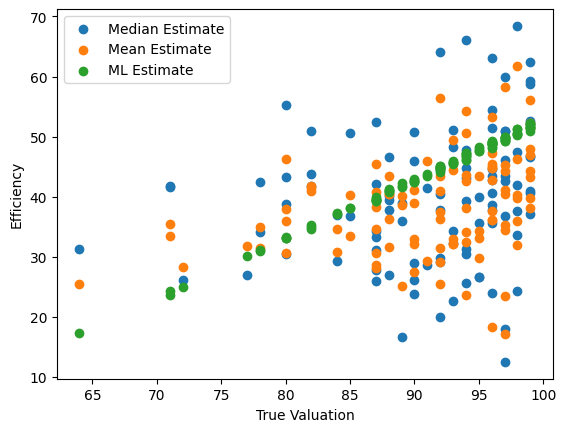

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def calculate_median(bids):
    return np.median(bids)

def calculate_mean(bids):
    return np.mean(bids)

def calculate_ml_estimate(bids, historical_bids, historical_values):
    # Use Linear Regression to predict value based on historical bidding data
    model = LinearRegression()
    model.fit(historical_bids.reshape(-1, 1), historical_values)
    return model.predict(bids.reshape(-1, 1))[0]

def simulate_auction(num_bidders, num_simulations, historical_bids, historical_values):
    true_valuations = np.zeros(num_simulations)
    median_estimates = np.zeros(num_simulations)
    mean_estimates = np.zeros(num_simulations)
    ml_estimates = np.zeros(num_simulations)
    median_efficiencies = np.zeros(num_simulations)
    mean_efficiencies = np.zeros(num_simulations)
    ml_efficiencies = np.zeros(num_simulations)

    for i in range(num_simulations):
        # Generate random valuations for bidders
        valuations = np.random.randint(10, 100, num_bidders)
        # maybe modify
        true_valuation = np.max(valuations)
        true_valuations[i] = true_valuation

        # Generate random bids based on valuations
        bids = np.random.uniform(0.8, 1.2, num_bidders) * valuations

        # Calculate consensus estimates using different methods
        median_estimate = calculate_median(bids)
        mean_estimate = calculate_mean(bids)
        ml_estimate = calculate_ml_estimate(bids, historical_bids, historical_values)

        # Calculate efficiencies
        median_efficiency = true_valuation - median_estimate
        mean_efficiency = true_valuation - mean_estimate
        ml_efficiency = true_valuation - ml_estimate

        # Store results
        median_estimates[i] = median_estimate
        mean_estimates[i] = mean_estimate
        ml_estimates[i] = ml_estimate
        median_efficiencies[i] = median_efficiency
        mean_efficiencies[i] = mean_efficiency
        ml_efficiencies[i] = ml_efficiency

    # Print average efficiencies
    print("Average Efficiencies:")
    print(f"Median Estimate: {np.mean(median_efficiencies)}")
    print(f"Mean Estimate: {np.mean(mean_efficiencies)}")
    print(f"ML Estimate: {np.mean(ml_efficiencies)}")

    # Plot the efficiencies
    plt.scatter(true_valuations, median_efficiencies, label='Median Estimate')
    plt.scatter(true_valuations, mean_efficiencies, label='Mean Estimate')
    plt.scatter(true_valuations, ml_efficiencies, label='ML Estimate')
    plt.xlabel('True Valuation')
    plt.ylabel('Efficiency')
    plt.legend()
    plt.show()

# Set the number of bidders and simulations for the experiment
num_bidders = 10
num_simulations = 100

# Generate historical bidding data and values
historical_bids = np.random.uniform(0.8, 1.2, 50) * np.random.randint(10, 100, 50)
historical_values = np.random.randint(10, 100, 50)

# Run the auction simulation
simulate_auction(num_bidders, num_simulations, historical_bids, historical_values)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Average Efficiencies:
Median Estimate: 38.218831702199765
Mean Estimate: 37.12327685159085
Cluster Estimate: 36.76085612173754


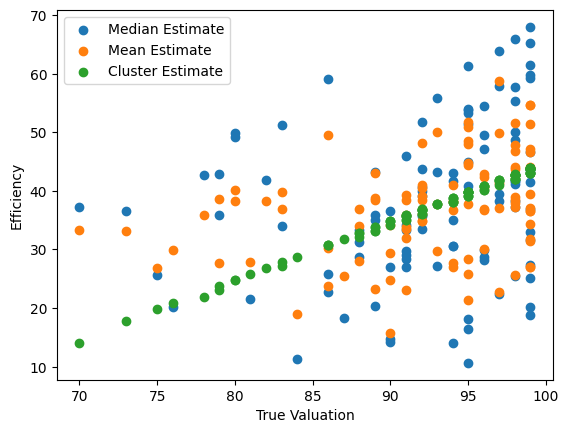

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def generate_historical_bids(num_bidders, num_samples):
    historical_bids = np.zeros((num_samples, num_bidders))

    for i in range(num_samples):
        valuations = np.random.randint(10, 100, num_bidders)
        true_valuation = np.max(valuations)
        bids = np.random.uniform(0.8, 1.2, num_bidders) * valuations
        historical_bids[i] = bids

    return historical_bids

def calculate_cluster_estimate(bids):
    kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
    kmeans.fit(bids.reshape(-1, 1))
    cluster_centers = kmeans.cluster_centers_.flatten()
    cluster_estimate = np.mean(cluster_centers)
    return cluster_estimate

def simulate_auction(num_bidders, num_simulations, num_samples):
    true_valuations = np.zeros(num_simulations)
    median_estimates = np.zeros(num_simulations)
    mean_estimates = np.zeros(num_simulations)
    cluster_estimates = np.zeros(num_simulations)
    median_efficiencies = np.zeros(num_simulations)
    mean_efficiencies = np.zeros(num_simulations)
    cluster_efficiencies = np.zeros(num_simulations)

    historical_bids = generate_historical_bids(num_bidders, num_samples)

    for i in range(num_simulations):
        valuations = np.random.randint(10, 100, num_bidders)
        true_valuation = np.max(valuations)
        true_valuations[i] = true_valuation

        bids = np.random.uniform(0.8, 1.2, num_bidders) * valuations

        median_estimate = calculate_median(bids)
        mean_estimate = calculate_mean(bids)
        cluster_estimate = calculate_cluster_estimate(historical_bids)

        median_efficiency = true_valuation - median_estimate
        mean_efficiency = true_valuation - mean_estimate
        cluster_efficiency = true_valuation - cluster_estimate

        median_estimates[i] = median_estimate
        mean_estimates[i] = mean_estimate
        cluster_estimates[i] = cluster_estimate
        median_efficiencies[i] = median_efficiency
        mean_efficiencies[i] = mean_efficiency
        cluster_efficiencies[i] = cluster_efficiency

    print("Average Efficiencies:")
    print(f"Median Estimate: {np.mean(median_efficiencies)}")
    print(f"Mean Estimate: {np.mean(mean_efficiencies)}")
    print(f"Cluster Estimate: {np.mean(cluster_efficiencies)}")

    plt.scatter(true_valuations, median_efficiencies, label='Median Estimate')
    plt.scatter(true_valuations, mean_efficiencies, label='Mean Estimate')
    plt.scatter(true_valuations, cluster_efficiencies, label='Cluster Estimate')
    plt.xlabel('True Valuation')
    plt.ylabel('Efficiency')
    plt.legend()
    plt.show()

# Set the number of bidders, simulations, and historical bidding data samples for the experiment
num_bidders = 10
num_simulations = 100
num_samples = 100

# Run the auction simulation
simulate_auction(num_bidders, num_simulations, num_samples)
